In [ ]:
"""\
- We use this notebook just to test the class where we have enconded all the 
  mathematical expressions for the 2D scalar fields and tools to visualase them -
"""

In [ ]:
# If you want to use latex with matplotlib ---------------------------------------------
# !apt install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super
# !pip install -y latex

In [1]:
# Import standard libraries
# -

# Third-Party Libraries
import numpy as np
import matplotlib.pyplot as plt

# Import the Swarm Systems Lab Simulator
from ssl_simulator.math import R_2D_matrix
from ssl_simulator.visualization import set_paper_parameters, config_data_axis
set_paper_parameters(fontsize=15)

# -------------------------------------------------------------------------------------

# Import the scalar field functions
from ssl_simulator.scalar_fields import SigmaGauss, SigmaNonconvex, SigmaFract 

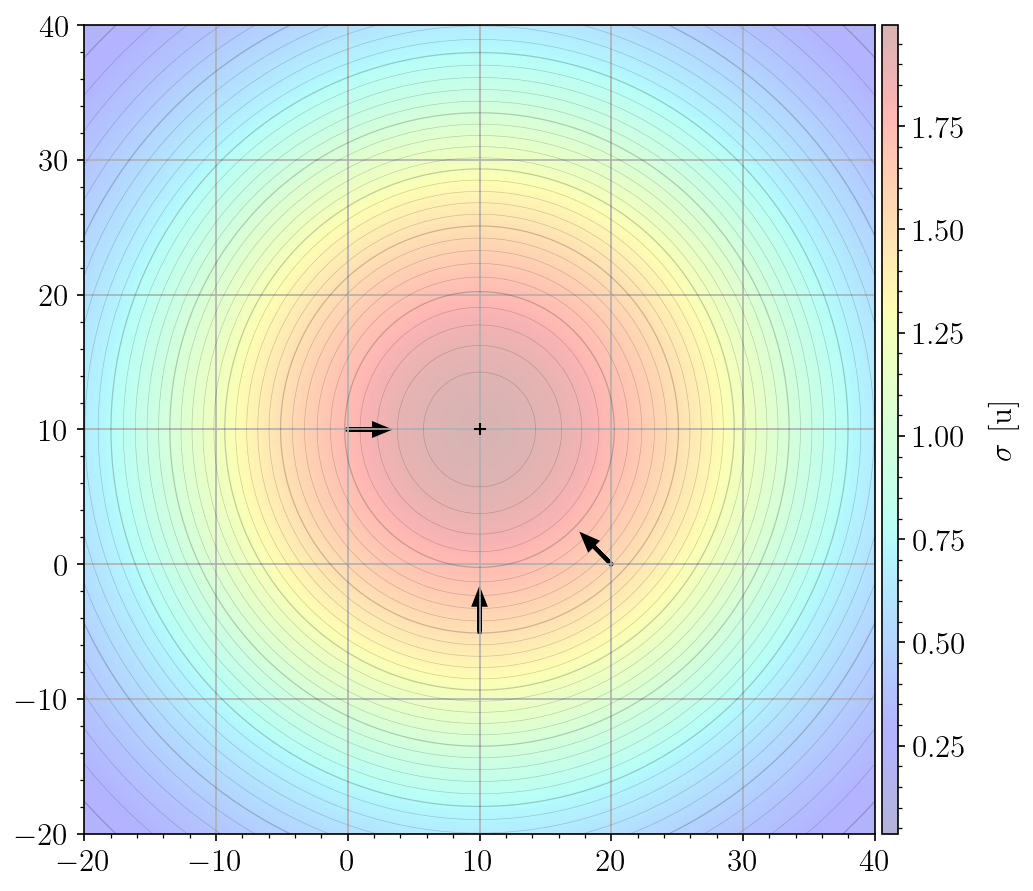

In [2]:
# ----------------------------------------------------------------------
# Testing the gaussian field
# ----------------------------------------------------------------------

max_int = 100
mu = np.array([10,10])
dev = 20

psi = 45 * np.pi / 180
a, b = 2, 1

# Generate the scalar field
S = np.array([[a,0],[0,b]])
R = R_2D_matrix(psi)
A = R @ S @ R.T
A = np.eye(2)

sigma_test = SigmaGauss(mu=mu, max_intensity=max_int, dev=dev)
sigma_test.A = A

# Generate the plot
fig = plt.figure(figsize=(7, 7), dpi=150)
ax = fig.subplots()

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax, xlim=40, ylim=40, n=300, contour_levels=7)
config_data_axis(ax, xlims=[-20,40], ylims=[-20,40], y_right=False)

# Draw multiple gradients
kw_arr = {"s":3, "lw":2, "hw":0.8, "hl":1}
sigma_test.draw_grad([0,10], ax, norm_fct=1, **kw_arr)
sigma_test.draw_grad([20,0], ax, norm_fct=1, **kw_arr)
sigma_test.draw_grad([10,-5], ax, norm_fct=1, **kw_arr)

ax.grid(True)
plt.show()

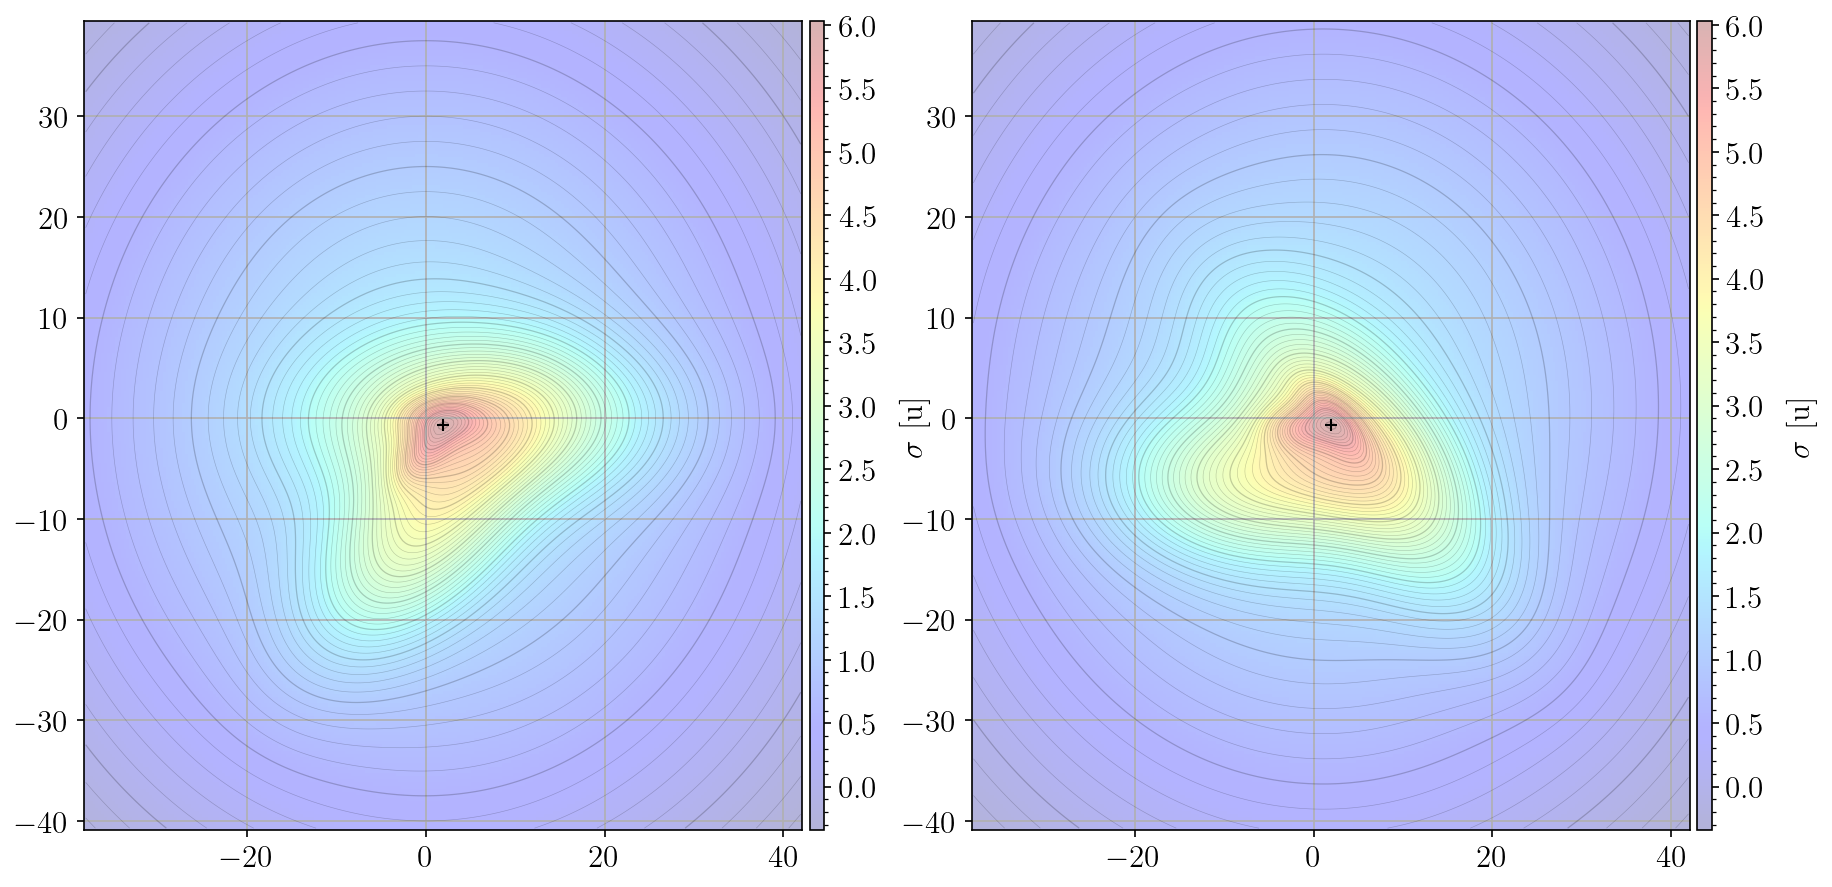

In [4]:
# ----------------------------------------------------------------------
# Testing a non-convex field with one source (sigma_fract)
# ----------------------------------------------------------------------

sigma_test = SigmaFract(k=0.04, dev=[7,2], mu=[0,0])

# --------------------------------------------------------------------------------------

# Generate the plot
fig = plt.figure(figsize=(14, 7), dpi=150)
(ax1, ax2) = fig.subplots(1,2)

# Draw the original scalar field
sigma_test.draw(fig=fig, ax=ax1, xlim=40, ylim=40, contour_levels=10)

# Rotate the scalar field
R = R_2D_matrix(45 * np.pi / 180)
sigma_test.A = R

# Draw the rotated scalar field
sigma_test.draw(fig=fig, ax=ax2, xlim=40, ylim=40, contour_levels=10)

ax1.grid(True)
ax2.grid(True)
plt.show()

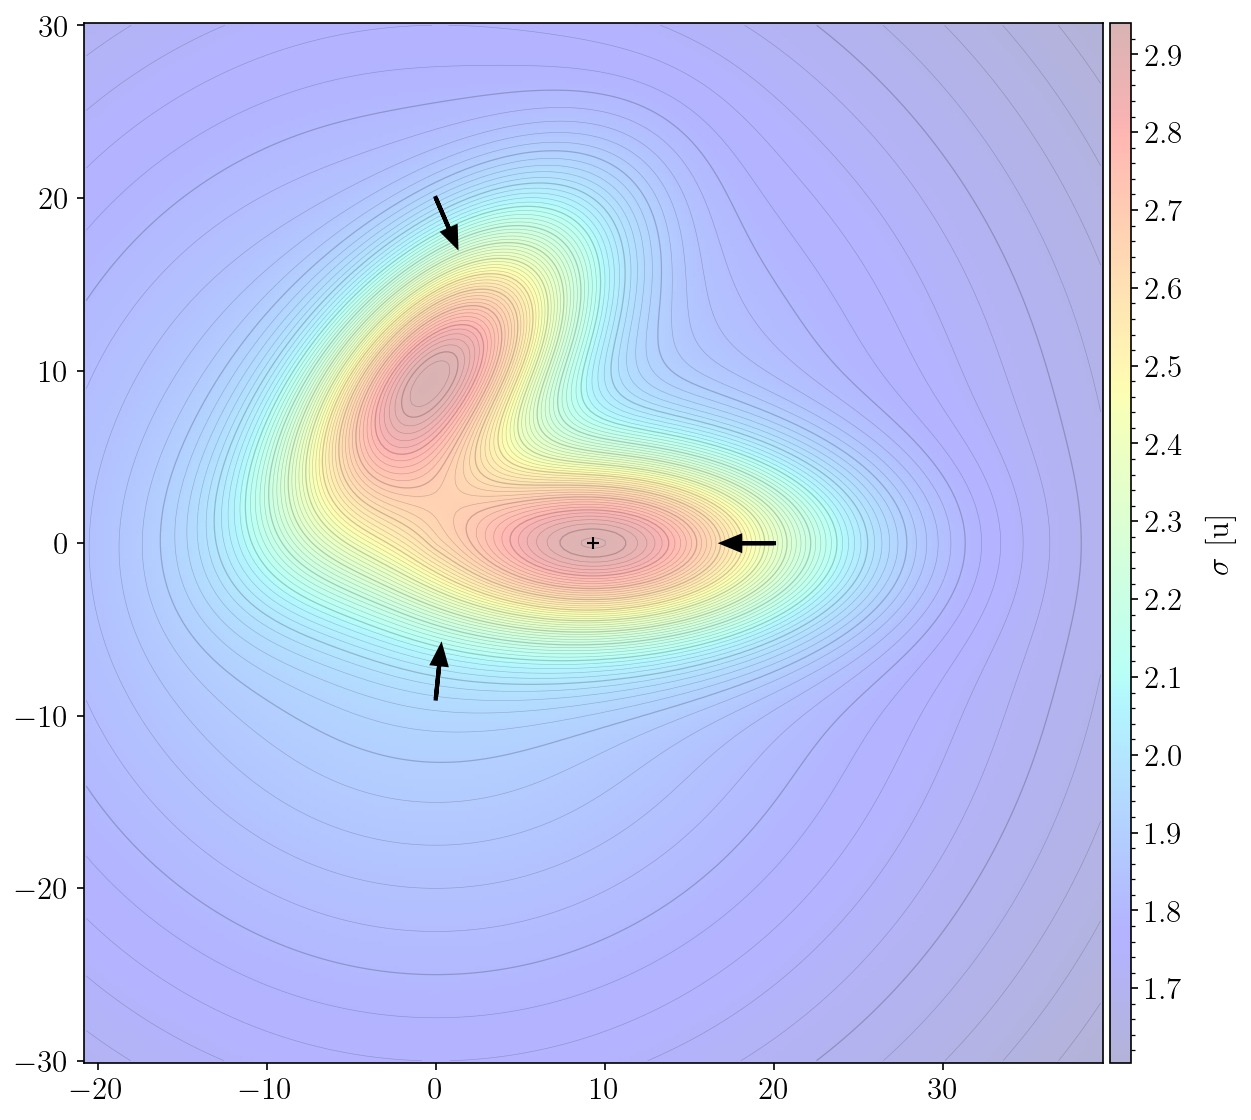

In [7]:
# ----------------------------------------------------------------------
# Testing a non-convex field with two sources (sigma_nonconvex)
# ----------------------------------------------------------------------

# Generate the scalar field
sigma_test = SigmaNonconvex(k=0.04, dev=5, a=[2,0], b=[0,2])

# Generate the plot
fig = plt.figure(figsize=(9, 9), dpi=150)
ax = fig.subplots()

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax, xlim=30, ylim=30, contour_levels=10)
#sigma_test.draw_imshow(fig, ax)

# Draw multiple gradients
kw_arr = {"s":3, "lw":2, "hw":0.8, "hl":1}
sigma_test.draw_grad([0, 20], ax, norm_fct=1, **kw_arr)
sigma_test.draw_grad([20, 0], ax, norm_fct=1, **kw_arr)
sigma_test.draw_grad([0,-9], ax, norm_fct=1, **kw_arr)

plt.show()